# Matplotlib Fundamentals
## 🚩 Goals
1. Understand the difference between the two primary Matplotlib plotting frameworks
2. Identify the key components of an object-oriented plot
3. Build different variations of line, bar and pie charts, as well as scatterplots and histograms
4. Customize charts by adding custom titles, labels, legends, annotations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. Compatible Data Types
- Python list, tuple
- Numpy arrays
- Pandas series, dataframe

### 2. Plotting Dataframe
- When plotting a dataframe, Matplotlib will...
    - Use the 'index' as the x-axis
    - Plot each column as a separate series by default
- Plotting each series independently allows for improved customization

Text(0.5, 1.0, 'Product Sales and Profits')

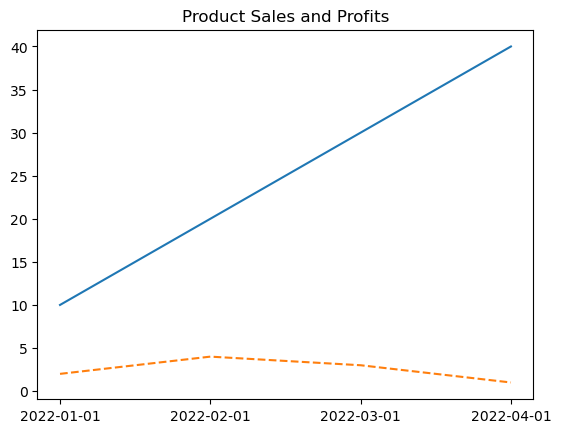

In [2]:
data_dict = {
    'Sales': [10, 20, 30, 40],
    'Profits': [2, 4, 3, 1],
    'Date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01']
}

df = pd.DataFrame(
    data_dict,
    columns=['Sales', 'Profits'],
    index=data_dict['Date']
)

fig, ax = plt.subplots()

# ax.plot(df)
ax.plot(df.index, df['Sales'])
ax.plot(df.index, df['Profits'], linestyle='--')
ax.set_title('Product Sales and Profits')

### 3. Chart Titles, Axis Labels
- Chart Titles: ax.set_title
- Axis Labels: ax.set_xlabel/ax.set_ylabel

In [3]:
housing_raw = pd.read_csv(
    './data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)

In [4]:
ca_housing = housing_raw[housing_raw['region_name'].str.contains('CA')].assign(
    region_name=housing_raw['region_name'].str[:-11])
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [5]:
ca_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.1+ MB


In [6]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='median_active_list_price'
).assign(CA_average=lambda x: x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [7]:
ca_housing_markets = ca_housing_pivot.loc[
    :,
    ['San Francisco', 'Los Angeles', 'San Diego', 'CA_average']
]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


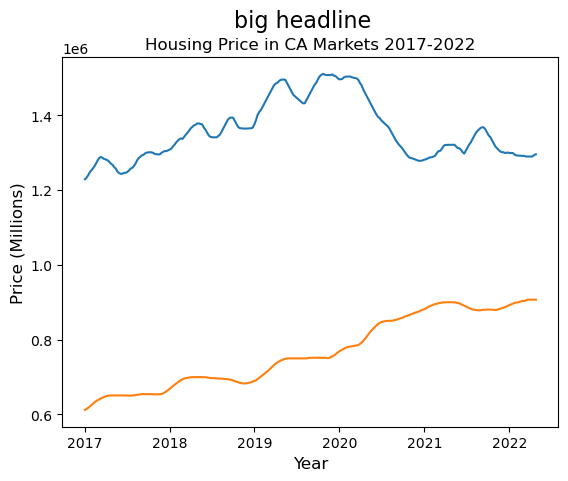

In [8]:
# title, label Setting
fig, ax = plt.subplots()

ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'])
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'])

fig.suptitle('big headline', fontsize=16)
ax.set_title('Housing Price in CA Markets 2017-2022', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Price (Millions)', fontsize=12);

### 4. Chart Legends
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- ax.legend
    - Location Arguments
        - loc: best, lower/center/upper/left/right의 조합
        - bbox_to_anchor: coordinate
    - Style Arguments
        - frameon: border of legend(boolean)
- ax.plot 안에 label 명시
- ⚠️ plotting order and legend sequence MUST MATCH

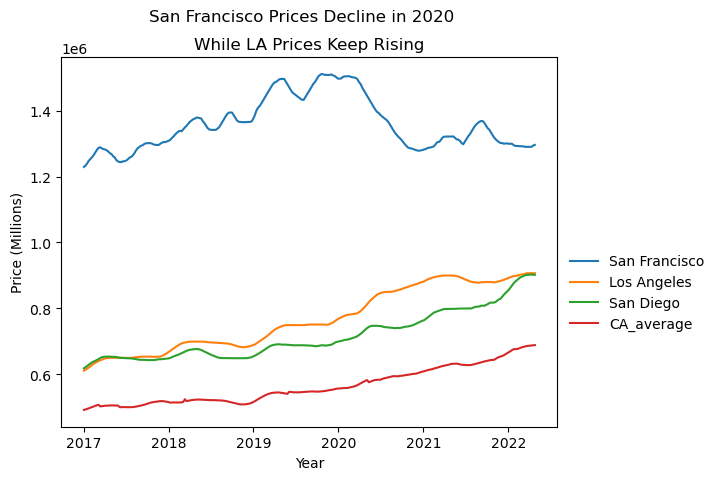

In [9]:
fig, ax = plt.subplots()

ax.plot(ca_housing_markets)

# ax.plot(
#     ca_housing_markets.index,
#     ca_housing_markets['San Francisco'],
#     label='San Francisco'
# )
# ax.plot(
#     ca_housing_markets.index,
#     ca_housing_markets['Los Angeles'],
#     label='Los Angeles'
# )

fig.suptitle('San Francisco Prices Decline in 2020')
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

ax.legend(ca_housing_markets.columns, bbox_to_anchor=(1, 0.5), frameon=False);

### 5. Line Style
- Arguments
    - linestyle
    - linewidth
    - color

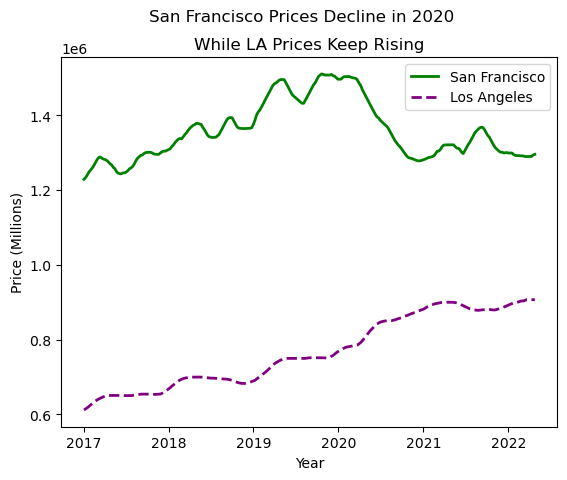

In [10]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

fig.suptitle('San Francisco Prices Decline in 2020')
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

ax.legend();

### 6. Axis Limits
- ax.set_xlim/ax.set_ylim
- ✅ Keeping the base of the y-axis at 0 highlights the true magnitude of change across periods and the difference between the series

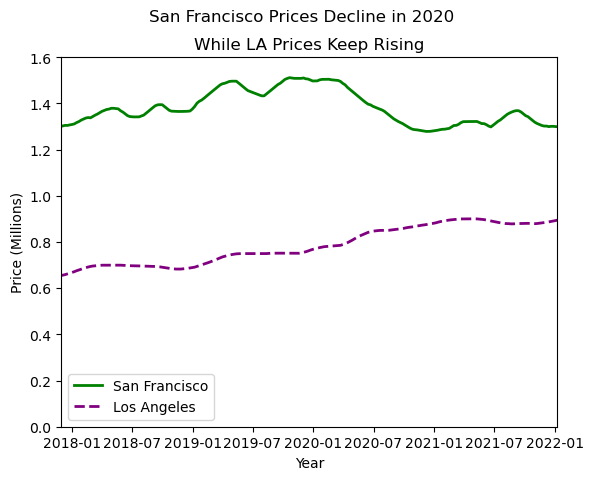

In [11]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'] / 1000000,
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

fig.suptitle('San Francisco Prices Decline in 2020')
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

ax.legend(loc='lower left')

ax.set_xlim(17500, 19000)
ax.set_ylim(0, 1.6);

### 7. Figure Size
- Increasing the figure size is a great way to add white space without touching xtick labels settings
- Even configuring a figsize modifies the gap between suptitle and title
- ✅ NO too much FORMATTING before touching a figsize
    - Consider RELATIONS between figsize and all other style arguments(ex. fontsize)

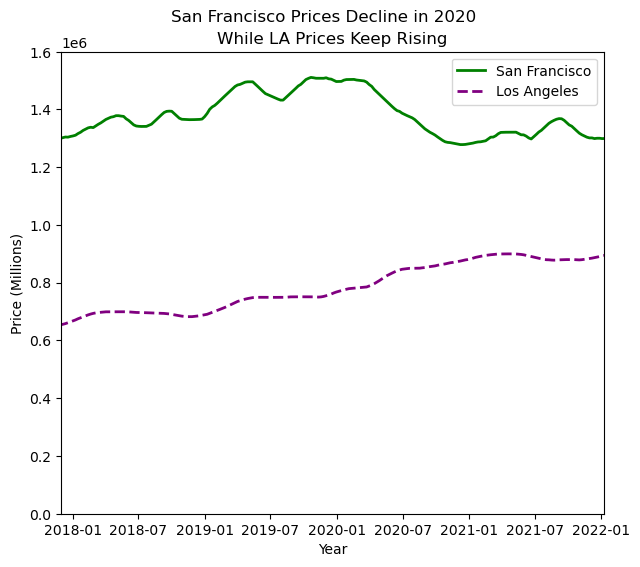

In [12]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

fig.suptitle('San Francisco Prices Decline in 2020', y=.95)
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')

ax.set_xlim(17500, 19000)
ax.set_ylim(0, 1600000)

ax.legend();

### 8. Custom Axis Ticks
- X-axis Customizing > Y-axis Customizing
- ax.set_xticks(iterable)

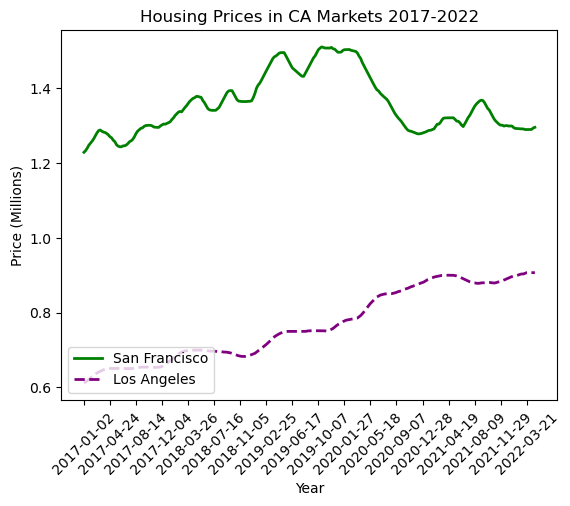

In [13]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'] / 1000000,
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')
ax.set_xticks(ca_housing_markets.index[::16])
ax.tick_params(axis='x', labelrotation=45)

ax.legend(loc='lower left');

### 9. Vertical Lines
- ax.axvline

In [14]:
import datetime as dt

dt.datetime(2018, 3, 21) - dt.datetime(1970, 1, 1)

datetime.timedelta(days=17611)

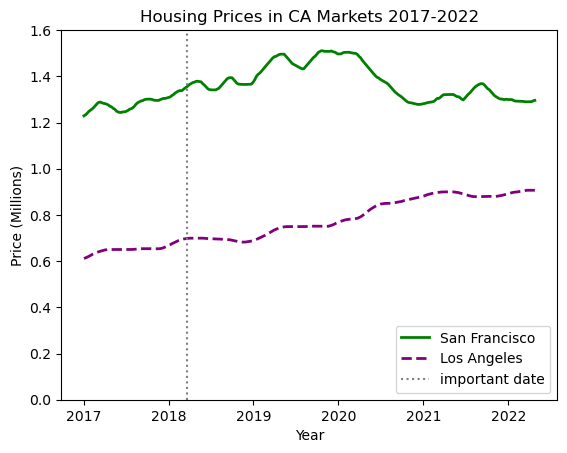

In [15]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'] / 1000000,
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')
ax.set_ylim(0, 1.6)
ax.axvline(
    17611,
    color='gray',
    linestyle=':',
    label='important date'
)
# ax.axvline(
#     dt.datetime(2018, 3, 21),
#     color='gray',
#     linestyle=':',
#     label='important date'
# )

ax.legend(loc='lower right');

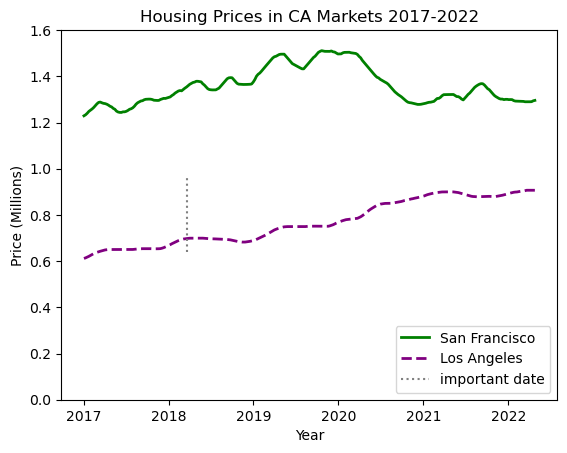

In [16]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'] / 1000000,
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

ax.set_title('Housing Prices in CA Markets 2017-2022')
ax.set_xlabel('Year')
ax.set_ylabel('Price (Millions)')
ax.set_ylim(0, 1.6)
# ax.axvline(
#     17611,
#     color='gray',
#     linestyle=':',
#     label='important date'
# )
ax.axvline(
    dt.datetime(2018, 3, 21),
    color='gray',
    linestyle=':',
    label='important date',
    ymin=.4,
    ymax=.6
)

ax.legend(loc='lower right');

### 10. Text
- A Method to add context to chart
- ax.text(x-coord, y-coord, string)

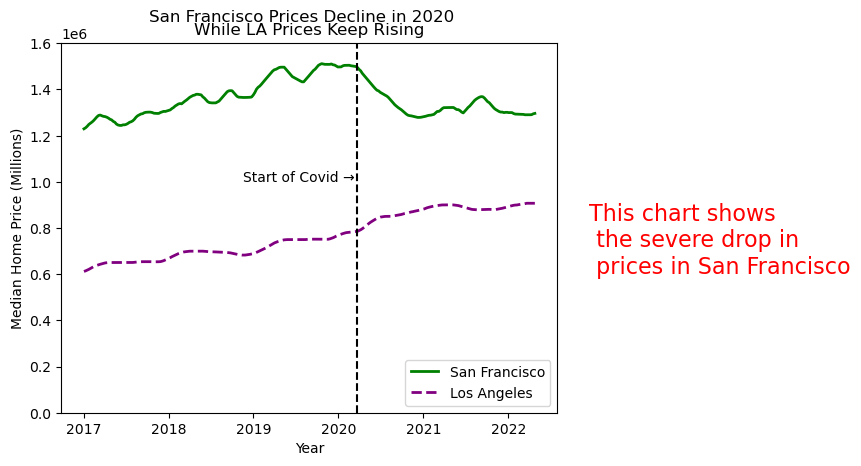

In [17]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'],
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'],
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

fig.suptitle('San Francisco Prices Decline in 2020', y=.95)
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Median Home Price (Millions)')
ax.set_ylim(0, 1600000)
ax.axvline(
    18341,
    color='black',
    linestyle='--',
)

ax.text(17850, 1000000, 'Start of Covid →')

fig.text(
    .95, .4,
    'This chart shows\n the severe drop in\n prices in San Francisco',
    fontsize=16,
    color='red'
)

ax.legend(loc='lower right');

### 11. (✅PRO TIP) ANNOTATIONS
- https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation
- ax.annotate(string, datapoint coord, text coord, arrow style dict)

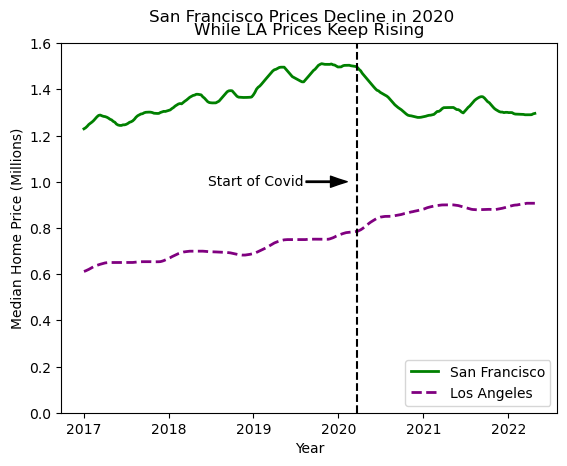

In [18]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco'] / 1000000,
    label='San Francisco',
    color='green',
    linewidth=2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    label='Los Angeles',
    color='purple',
    linewidth=2,
    linestyle='--'
)

fig.suptitle('San Francisco Prices Decline in 2020', y=.95)
ax.set_title('While LA Prices Keep Rising')
ax.set_xlabel('Year')
ax.set_ylabel('Median Home Price (Millions)')
ax.set_ylim(0, 1.6)
ax.axvline(
    18341,
    color='black',
    linestyle='--',
)

ax.annotate(
    'Start of Covid',
    xy=(18300, 1),
    xytext=(17700, 1),
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        connectionstyle='angle3, angleA=270, angleB=0'
    ),
    verticalalignment='center'
)


ax.legend(loc='lower right');

### 12. Remove Borders
- remove spines
    - ax.spines[].set_visible(False)

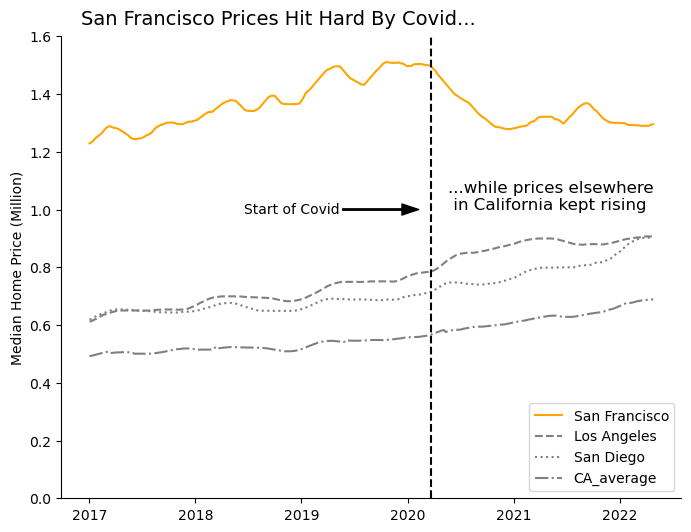

In [19]:
colors = ['orange', 'grey', 'grey', 'grey']
linestyle = ['-', '--', ':', '-.']

fig, ax = plt.subplots(figsize=(8, 6))

for idx, column in enumerate(ca_housing_markets.columns):
    ax.plot(
        ca_housing_markets[column] / 1000000,
        color=colors[idx],
        linestyle=linestyle[idx],
        label=column
    )

ax.set_ylabel('Median Home Price (Million)')
ax.set_ylim(0, 1.6)
ax.axvline(
    18341,
    color='black',
    linestyle='--',
)

ax.annotate(
    'Start of Covid',
    xy=(18300, 1),
    xytext=(17700, 1),
    arrowprops=dict(
        facecolor='black',
        width=1,
        headwidth=8,
        connectionstyle='angle3, angleA=270, angleB=0'
    ),
    verticalalignment='center'
)

ax.legend(loc='lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(
    .15, .9,
    'San Francisco Prices Hit Hard By Covid...',
    fontsize=14
)

ax.text(
    18400, 1,
    '...while prices elsewhere\n in California kept rising',
    fontsize=12
);

## 🚩 Line Charts
- Show Trends Over Time
- ✅ Pro Tips
    1. Pivot tabular data to turn each unique series into a DataFrame column
    2. Set datetime as the index
    3. Divide your series by the appropriate units while plotting to simplify the y-axis scale

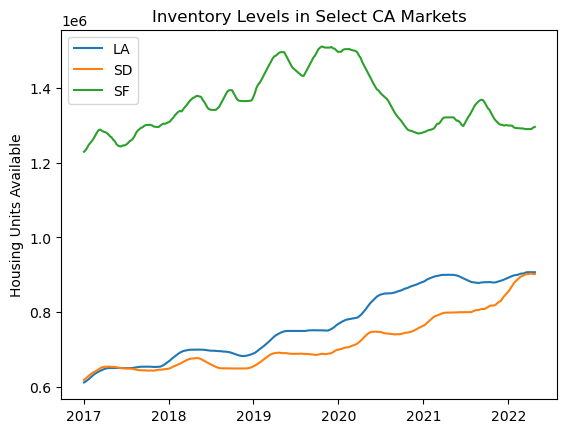

In [20]:
inventory = ca_housing_markets[['Los Angeles', 'San Diego', 'San Francisco']]

fig, ax = plt.subplots()

ax.plot(inventory.index, inventory['Los Angeles'])
ax.plot(inventory.index, inventory['San Diego'])
ax.plot(inventory.index, inventory['San Francisco'])

ax.set_title('Inventory Levels in Select CA Markets')
ax.set_ylabel('Housing Units Available')

ax.legend(['LA', 'SD', 'SF']);

### Stacked Line Charts
- Total values across categories
- The idea of stack plots is to show “parts to the whole” over time.

In [21]:
ca_housing_pivot = (
    ca_housing.pivot_table(
        index='period_begin',
        columns='region_name',
        values='inventory'
    ).assign(CA_average = lambda x: x.mean(axis=1))
    .loc[:, ['Los Angeles', 'San Diego', 'San Francisco', 'CA_average']]
)

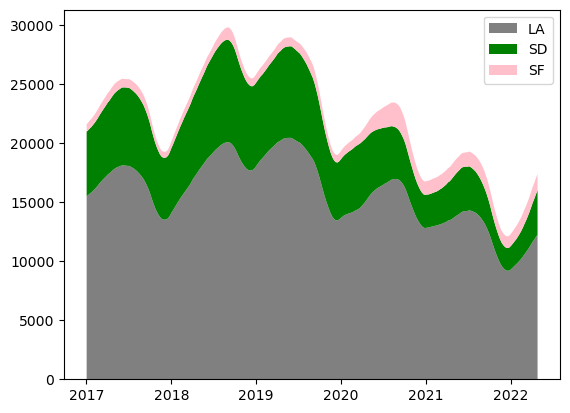

In [22]:
fig, ax = plt.subplots()
labels = ['LA', 'SD', 'SF']
colors = ['grey', 'green', 'pink']

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot['Los Angeles'],
    ca_housing_pivot['San Diego'],
    ca_housing_pivot['San Francisco'],
    labels=labels,
    colors=colors
)

ax.legend()

### Dual Axis Charts

In [23]:
housing_raw = pd.read_csv(
    './data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)
ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains('CA')]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin')
    .sort_index()  # Be Aware of Non-ordered index
)

In [24]:
sd_dual = (
    ca_housing
    .loc[ca_housing['region_name'] == 'San Diego',
                   ['inventory', 'median_active_list_price']]
)

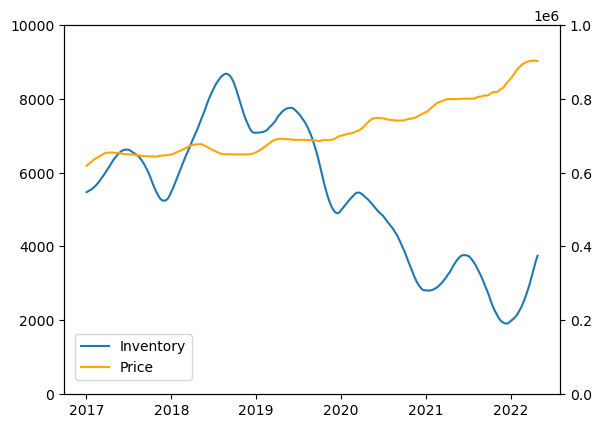

In [25]:
fig, ax = plt.subplots()

ax.plot(sd_dual['inventory'], label='Inventory')
ax.set_ylim(0, 10000)

ax2 = ax.twinx()
ax2.plot(
    sd_dual['median_active_list_price'],
    label='Price',
    color='orange'
)
ax2.set_ylim(0, 1000000)

fig.legend(bbox_to_anchor=(.335, .25))

## Bar Charts
- Compare Values Across Different Categories
- Length > Area
- ax.bar(category labels, bar heights)
- ✅ Pro Tips
    1. Use .groupby() method and .agg() to aggregate your data by category and push labels into the index
    2. Use seaborn/pandas plot API for grouped bar charts
    3. Use .axhline() to add a horizontal line at a specified y-value on a bar chart
    4. Use color argument to highlight the series you would like to focus on

In [26]:
total_sold = (
    ca_housing
    .groupby('region_name')
    .agg({'total_homes_sold': 'sum'})
    .sort_values('total_homes_sold', ascending=False)
    .iloc[:10]
)

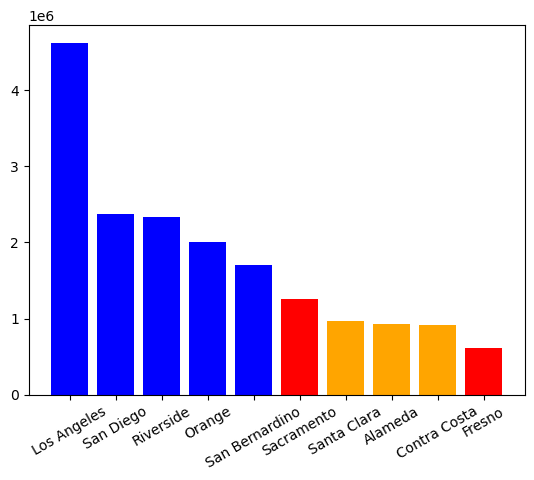

In [27]:
colors = ['blue']*5 + ['red'] + ['orange']*3 + ['red']

fig, ax = plt.subplots()

ax.bar(
    total_sold.index,
    total_sold['total_homes_sold'],
    color=colors
)

ax.tick_params(axis='x', labelrotation=30)

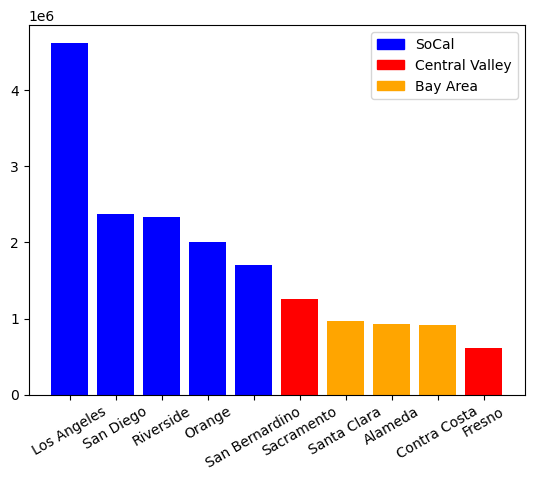

In [28]:
import matplotlib.patches as mpatches

colors = ['blue']*5 + ['red'] + ['orange']*3 + ['red']

fig, ax = plt.subplots()

ax.bar(
    total_sold.index,
    total_sold['total_homes_sold'],
    color=colors
)

# create legend totally disconnected from the chart
socal = mpatches.Patch(color='blue', label='SoCal')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label='Bay Area')

plt.legend(handles=[socal, central, bay], loc='upper right')

ax.tick_params(axis='x', labelrotation=30)

### Stacked Bar Charts
- Use 'bottom' argument
- 100% Stacked Bar Charts
    - 총합보다는 category별 contribution 파악 용도
    - matplotlib 코드는 건드리지 않고 데이터를 가공

In [29]:
# pandas.cut → continuous values into categorical values

ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(['CA', 'OR', 'WA'])]
ca_or = ca_or.assign(
    price_range = pd.cut(
        ca_or.loc[:, 'median_active_list_price'],
        [0, 400000, 600000, 2000000],
        labels=['0-400k', '400-600k', '600k+']
    ),
    state = ca_or['region_name'].str[-2:]
)
ca_or = (
    ca_or
    .query("period_end == '2021-08-01'")
    .pivot_table(
        index='price_range',
        columns='state',
        values='inventory',
        aggfunc='sum'
    )
)
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


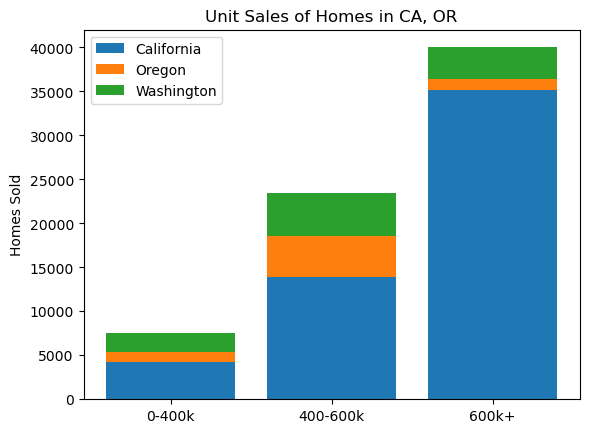

In [30]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label='California'
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label='Oregon',
    bottom=ca_or['CA']
)

ax.bar(
    ca_or.index,
    ca_or['WA'],
    label='Washington',
    bottom=ca_or['CA']+ca_or['OR']
)

ax.set_title('Unit Sales of Homes in CA, OR')
ax.set_ylabel('Homes Sold')

ax.legend();

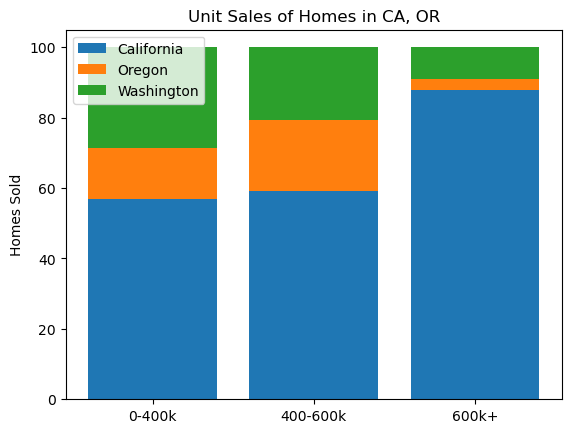

In [31]:
# 100% Stacked Bar Charts
ca_or = ca_or.apply(lambda x: x * 100 / sum(x), axis=1)

fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label='California'
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label='Oregon',
    bottom=ca_or['CA']
)

ax.bar(
    ca_or.index,
    ca_or['WA'],
    label='Washington',
    bottom=ca_or['CA']+ca_or['OR']
)

ax.set_title('Unit Sales of Homes in CA, OR')
ax.set_ylabel('Homes Sold')

ax.legend();

### Grouped Bar Charts
Much Easier When Using Seaborn, Pandas Matplotlib API

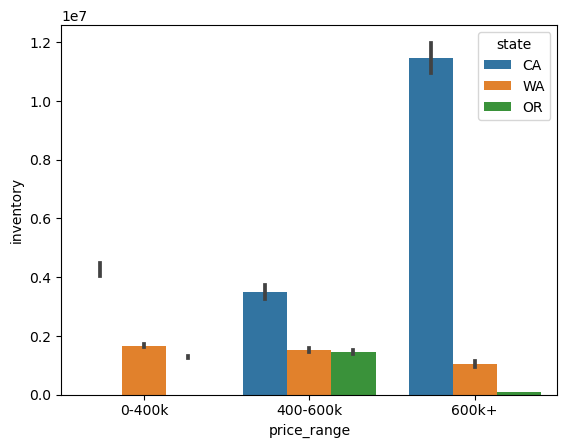

In [32]:
# 1) seaborn
import seaborn as sns

ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(['CA', 'OR', 'WA'])]
ca_or = ca_or.assign(
    price_range = pd.cut(
        ca_or.loc[:, 'median_active_list_price'],
        [0, 400000, 600000, 2000000],
        labels=['0-400k', '400-600k', '600k+']
    ),
    state = ca_or['region_name'].str[-2:]
)

sns.barplot(
    x='price_range',
    y='inventory',
    hue='state',
    estimator=sum,
    data=ca_or
);

In [33]:
ca_or = (
    ca_or
    .query("period_end == '2021-08-01'")
    .pivot_table(
        index='price_range',
        columns='state',
        values='inventory',
        aggfunc='sum'
    )
)
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


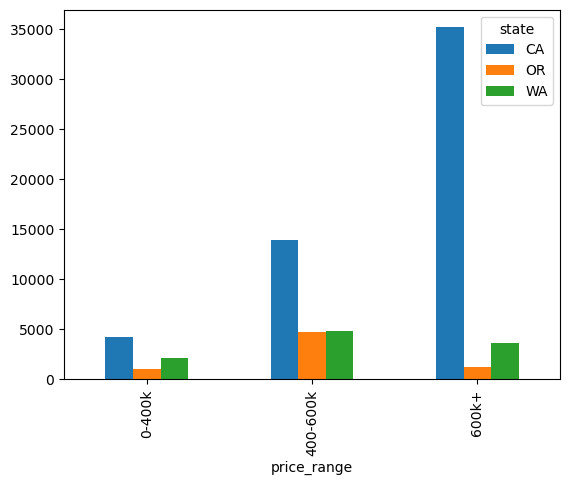

In [34]:
# 2) andas matplotlib API
ca_or.plot.bar();

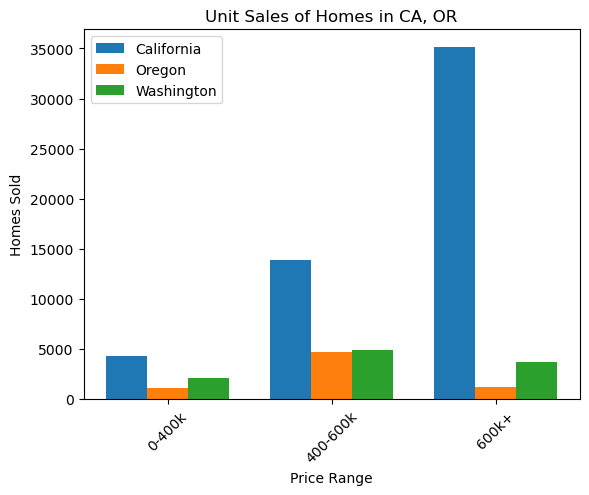

In [35]:
# 3) matplotlib
fig, ax = plt.subplots()

width = .25
x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1,
    ca_or['CA'],
    label='California',
    width=width
)
ax.bar(
    x2,
    ca_or['OR'],
    label='Oregon',
    width=width
)
ax.bar(
    x3,
    ca_or['WA'],
    label='Washington',
    width=width
)

ax.set_title('Unit Sales of Homes in CA, OR')
ax.set_ylabel('Homes Sold')

ax.set_xlabel('Price Range')
ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index, rotation=45)

ax.legend();

### Combo Charts
- Multiple Types of Charts in a Single Ax
- Specify different chart types in a dual axis plot
- ✅ Pro Tips
    1. Line Chart와 Bar Chart 동시에 그릴 때 Bar Chart의 'width' argument 조정

In [36]:
housing_raw = pd.read_csv(
    './data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)
ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains('CA')]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin')
    .sort_index()  # Be Aware of Non-ordered index
)
sd_dual = (
    ca_housing
    .loc[ca_housing['region_name'] == 'San Diego',
        ['inventory', 'median_active_list_price']]
).sort_index()

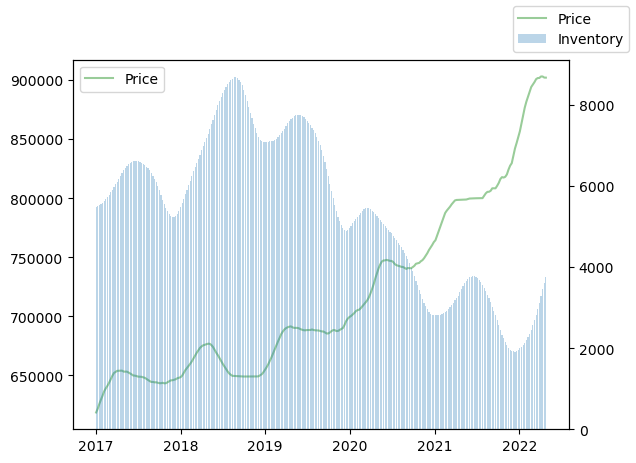

In [37]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    sd_dual['median_active_list_price'],
    color='green',
    alpha=.4,
    label='Price'
)
ax.legend()

ax2 = ax.twinx()

ax2.bar(
    sd_dual.index,
    sd_dual['inventory'],
    width=5,
    alpha=.3,
    label='Inventory'
)

fig.legend();

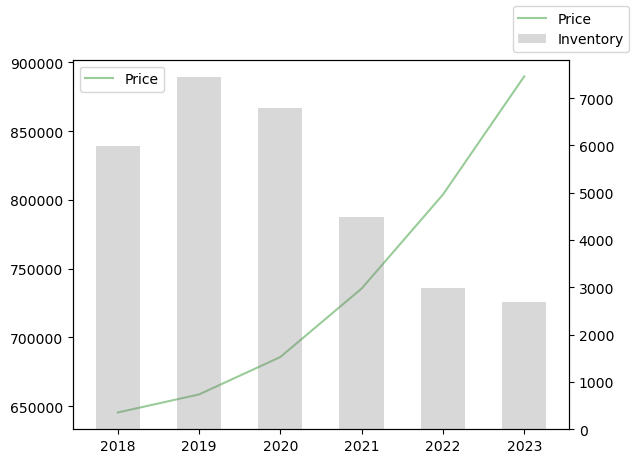

In [38]:
sd_dual2 = sd_dual.resample('Y').mean()

fig, ax = plt.subplots()

width = 200

ax.plot(
    sd_dual2['median_active_list_price'],
    color='green',
    alpha=.4,
    label='Price'
)
ax.legend()

ax2 = ax.twinx()

ax2.bar(
    sd_dual2.index,
    sd_dual2['inventory'],
    width=width,
    color='grey',
    alpha=.3,
    label='Inventory'
)

fig.legend();

### Pie Charts
- Compare Proportions Totaling 100%
- ✅ Pro Tips
    1. Number of slices LESS THAN 7 (for readability) - group OTHERS into a single slice
    2. Use bar chart for compare, Use pie chart to show how they make up a whole
    3. Make donut charts from pie charts

In [39]:
sales_totals = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby('region_name')
    .agg({'total_homes_sold': 'sum'})
    .sort_values(by='total_homes_sold', ascending=False)
)
sales_totals

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


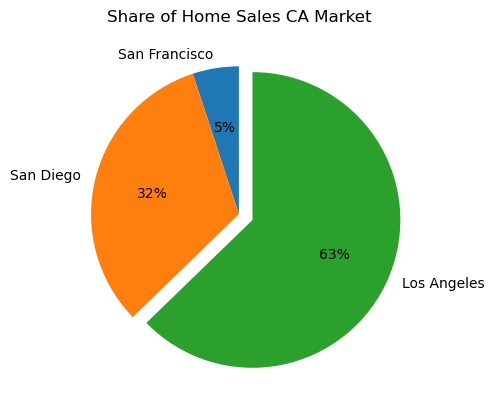

In [40]:
# pie chart
fig, ax = plt.subplots()

ax.pie(
    x=sales_totals['total_homes_sold'][::-1],
    startangle=90,
    labels=['Los Angeles', 'San Diego', 'San Francisco'][::-1],
    autopct='%.0f%%',
    explode=(0, 0, .1)
)

ax.set_title('Share of Home Sales CA Market');

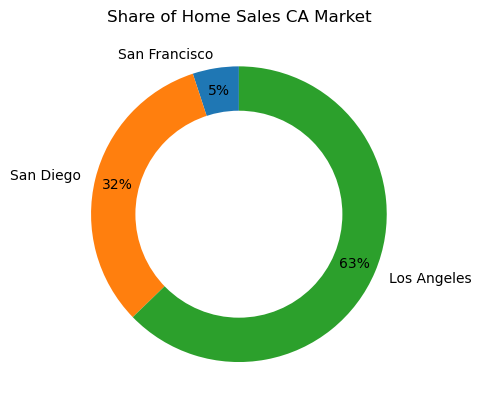

In [41]:
# donut chart
fig, ax = plt.subplots()

ax.pie(
    x=sales_totals['total_homes_sold'][::-1],
    startangle=90,
    labels=['Los Angeles', 'San Diego', 'San Francisco'][::-1],
    autopct='%.0f%%',
    pctdistance=.85
#     explode=(0, 0, .1)
)

hole = plt.Circle((0, 0), .7, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)

ax.set_title('Share of Home Sales CA Market');

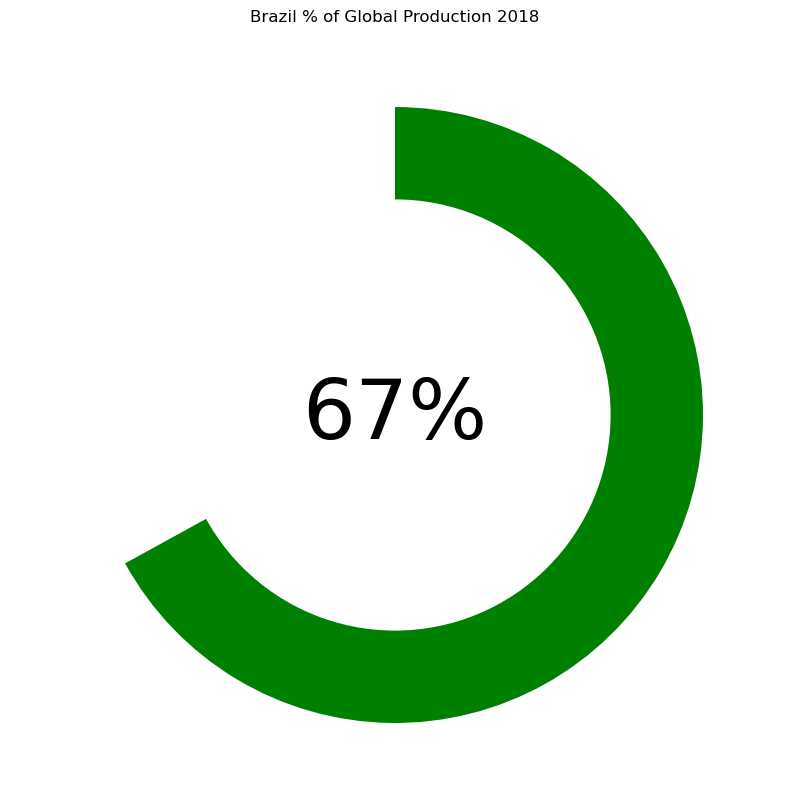

In [42]:
# progress bar
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    [.33, .67],
    startangle=90,
    labels=['', ''],
    pctdistance=.85,
    colors=['white', 'green']
)

hole = plt.Circle((0, 0), .7, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)
plt.text(0, 0, '67%', ha='center', va='center', fontsize=60)

ax.set_title('Brazil % of Global Production 2018', fontsize=12);

### Scatter Plot
- Visualize relationship between numerical variables
- ax.scatter(x-axis series, y-axis series, size, alpha)
- ✅ Pro Tips
    1. Modify alpha level to make overlapping points more visible
    2. Bubble charts can be useful in some cases, but often causes confusion rather than clarity
- Bubble Charts
    - specify third series in the size argument of ax.scatter()

### Histograms
- Visualize distribution of the numeric variable
- ax.hist(series, density, alpha, bins)
- ✅ Pro Tips
    1. Modify alpha level to plot multiple distributions on the same axis
    2. Set density=True to use relative frequencies on the y-axis (% of total)

In [48]:
diamonds = (
    pd.read_csv('./data/Diamonds Prices2022.csv')
    .drop(['Unnamed: 0'], axis=1)
)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


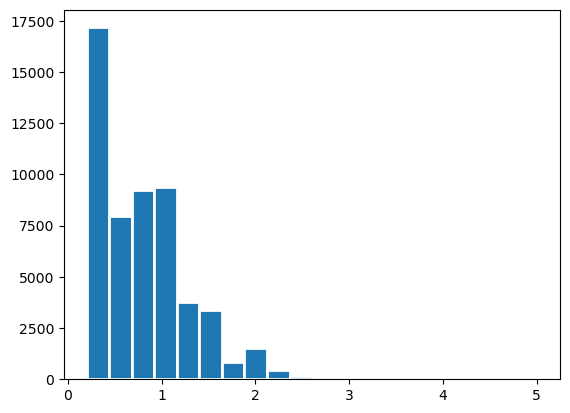

In [61]:
# bins 크기를 늘리면 디테일을 알 수 있다. (20가 적당)
fig, ax = plt.subplots()

ax.hist(
    diamonds['carat'],
    bins=20,
#     density=True,
    edgecolor='white',
    linewidth=2
);

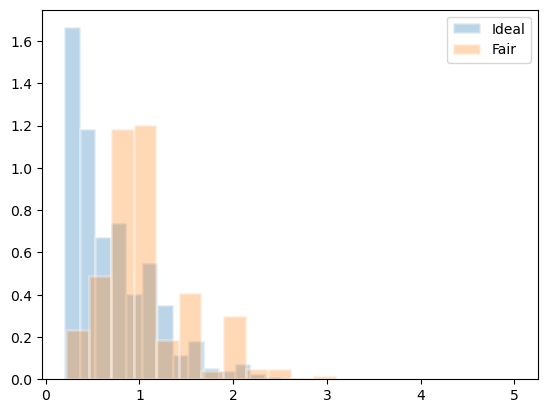

In [64]:
# 'density=True' (When each column's counts are different → 2개의 분포 비교)
fig, ax = plt.subplots()

ax.hist(
    diamonds.loc[diamonds['cut'] == 'Ideal', ['carat']],
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=2,
    alpha=.3
)
ax.hist(
    diamonds.loc[diamonds['cut'] == 'Fair', ['carat']],
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=2,
    alpha=.3
)

ax.legend(['Ideal', 'Fair']);